# Analyzing Chikungunya data

In [1]:
from pysus.ftp.databases.sinan import SINAN
import pandas as pd
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
sinan = SINAN().load()

In [3]:
casos = sinan.download(sinan.get_files('CHIK', 2015)).to_dataframe()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 827k/827k [00:00<00:00, 355MB/s]


In [4]:
casos

TP_NOT ID_AGRAVO CS_SUSPEIT  DT_NOTIFIC SEM_NOT NU_ANO SG_UF_NOT  \
0          2      A920             2015-09-08  201536   2015        29   
1          2      A920             2015-09-08  201536   2015        29   
2          2      A920             2015-09-08  201536   2015        29   
3          2      A920             2015-09-08  201536   2015        29   
4          2      A920             2015-09-08  201536   2015        29   
...      ...       ...        ...         ...     ...    ...       ...   
53266      2      A920             2015-09-08  201536   2015        29   
53267      2      A920             2015-09-08  201536   2015        29   
53268      2      A920             2015-09-08  201536   2015        29   
53269      2      A920             2015-09-08  201536   2015        29   
53270      2      A920             2015-09-08  201536   2015        29   

      ID_MUNICIP ID_REGIONA  DT_SIN_PRI  ... COPAISINF COMUNINF DOENCA_TRA  \
0         292630   1381      2015-09-05  ...      1      292630              
1         291360   1385      2015-08-28  ...      1      291360              
2         292740   1380      2015-09-01  ...      0                          
3         292895   1381      2015-09-04  ...      0                          
4         292895   1381      2015-09-05  ...      0                          
...          ...        ...         ...  ...       ...      ...        ...   
53266     292630   1381      2015-09-06  ...      1      292630              
53267     292630   1381      2015-09-07  ...      1      292630              
53268     292630   1381      2015-09-06  ...      1      292630              
53269     292630   1381      2015-09-07  ...      1      292630              
53270     292630   1381      2015-09-05  ...      1      292630              

      EVOLUCAO DT_OBITO DT_ENCERRA CS_FLXRET FLXRECEBI TP_SISTEMA TPUNINOT  
0                         20151009         0         2          1           
1                         20151228         0         2          1           
2                         20160111         0         2          1           
3                         20151111         0         2          1           
4                         20151111         0         2          1           
...        ...      ...        ...       ...       ...        ...      ...  
53266                     20151009         0         2          1           
53267                     20151009         0         2          1           
53268                     20151009         0         2          1           
53269                     20151009         0         2          1           
53270                     20151009         0         2          1           

[53271 rows x 38 columns]

In [5]:
casos = casos[casos.ID_AGRAVO=='A920']

casos.head()

TP_NOT ID_AGRAVO CS_SUSPEIT  DT_NOTIFIC SEM_NOT NU_ANO SG_UF_NOT ID_MUNICIP  \
0      2      A920             2015-09-08  201536   2015        29     292630   
1      2      A920             2015-09-08  201536   2015        29     291360   
2      2      A920             2015-09-08  201536   2015        29     292740   
3      2      A920             2015-09-08  201536   2015        29     292895   
4      2      A920             2015-09-08  201536   2015        29     292895   

  ID_REGIONA  DT_SIN_PRI  ... COPAISINF COMUNINF DOENCA_TRA EVOLUCAO DT_OBITO  \
0   1381      2015-09-05  ...      1      292630                                
1   1385      2015-08-28  ...      1      291360                                
2   1380      2015-09-01  ...      0                                            
3   1381      2015-09-04  ...      0                                            
4   1381      2015-09-05  ...      0                                            

  DT_ENCERRA CS_FLXRET FLXRECEBI TP_SISTEMA TPUNINOT  
0   20151009         0         2          1           
1   20151228         0         2          1           
2   20160111         0         2          1           
3   20151111         0         2          1           
4   20151111         0         2          1           

[5 rows x 38 columns]

In [6]:
casos.DT_NOTIFIC = pd.to_datetime(casos.DT_NOTIFIC)

In [7]:
casos = casos.set_index('DT_NOTIFIC')

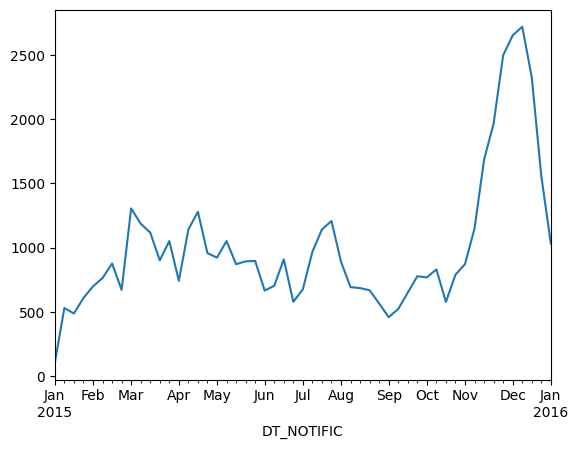

In [8]:
casos.ID_AGRAVO.resample('1W').count().plot();